In [7]:
import gzip
import random
import numpy as np
from Bio import SeqIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, probplot, kstest
import scipy.stats
import matplotlib.mlab as mlab
import pylab
import collections

In [8]:
snoRNA = "../../../CNN_training_RNAs/negative/snoRNA.fasta.gz"
piRNA = "../../../CNN_training_RNAs/negative/piRNAs.fasta.gz"
lncRNA = "../../../CNN_training_RNAs/negative/lncRNA.fasta.gz"
pre_miRNA = "../../../CNN_training_RNAs/negative/pre_miRNA.fasta.gz"
tRNA = "../../../CNN_training_RNAs/negative/tRNA.fasta.gz"
rRNA = "../../../CNN_training_RNAs/negative/rRNA.fasta.gz"
RNAs_not = [snoRNA,piRNA,lncRNA,pre_miRNA,tRNA,rRNA]
miRNAs_hexapoda = "../../../CNN_training_RNAs/positive/hexapoda.fa.gz"
miRNAs_dme_ame = "../../../CNN_training_RNAs/positive/ame_dme_miRNA.fasta.gz"

In [10]:
positive = []
with gzip.open(miRNAs_hexapoda, "rt") as handle:
        records = SeqIO.parse(handle, "fasta")
        subsample=[]
        for record in records:
            if "R" in record.seq:
                pass
            elif "W" in record.seq:
                pass
            elif "Y" in record.seq:
                pass
            elif "S" in record.seq:
                pass
            elif "K" in record.seq:
                pass
            elif "-" in record.seq:
                pass
            elif "N" in record.seq:
                pass
            elif len(record.seq) > 32:
#                 print(len(record.seq))
                pass
            elif len(record.seq) < 18:
#                 print(len(record.seq))
                pass
            else:
                subsample.append(record)
        for record in subsample:
            seq = str(record.seq)
            seq = seq.replace("U", "T")    
            positive.append(seq)
        print(len(positive))
        positive = list(np.unique(positive))
        print(len(positive))


4993
3399


In [4]:
len(positive)

3399

In [11]:
lengths_p = []
for seq in positive:
    lengths_p.append(len(seq))

In [135]:
np.min(lengths_p)

18

In [168]:
len(positive) /5

679.8

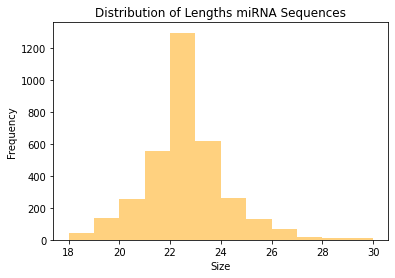

In [12]:
%matplotlib inline
plt.hist(lengths_p, color="orange", alpha=0.5,bins=12, label="miRNAs")
plt.title("Distribution of Lengths miRNA Sequences")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()

In [13]:
# looks like a gamma distribution lets check this using the kolmogorov smirnov test
alpha = np.mean(lengths_p) * np.mean(lengths_p) / np.var(lengths_p)
beta = np.mean(lengths_p) / np.var(lengths_p)
print(kstest(lengths_p,"gamma",args=(alpha,0,1./beta))[1])
# shows a p-value below 0.05, we can reject the null hypothesis this means this does not follow a gamma distribution 

1.8454069393381164e-110


In [17]:
STD = np.std(lengths_p)
MEAN = np.mean(lengths_p)
print(MEAN,STD)

22.12562518387761 1.6128125972385003


In [14]:
# Counting the amount of RNAs per type
for name, RNA in zip(["snoRNA", "piRNA","lncRNA","pre-miRNA", "tRNA","rRNA"],RNAs_not):
    counter = 0
    with gzip.open(RNA, "rt") as handle:
        for record in SeqIO.parse(handle,"fasta"):
            counter += 1
    print(name,": ", counter)

snoRNA :  5313
piRNA :  10766
lncRNA :  11852
pre-miRNA :  14640
tRNA :  1439597
rRNA :  1526700


In [15]:
def fragmentize(gzip_fasta):
    store = []
    with gzip.open(gzip_fasta, "rt") as handle:
        random.seed(10)
        records = SeqIO.parse(handle, "fasta")
        subsample = []
        for record in records:
            if "R" in record.seq:
                pass
            elif "W" in record.seq:
                pass
            elif "Y" in record.seq:
                pass
            elif "S" in record.seq:
                pass
            elif "K" in record.seq:
                pass
            if "-" in record.seq:
                pass
            elif "N" in record.seq:
                pass
            else:
                subsample.append(record)
        subsample = random.sample(list(subsample), 679)
        for record in subsample:
            seq = str(record.seq).upper()
            seq = seq.replace("U", "T")    
            if len(seq) < 17:
                pass
            elif len(seq) in range(17,32):
                store.append(seq)
            else:
                length = len(seq)
                frag_size = round(np.random.normal(MEAN+0.1,STD-0.50))
                if frag_size > 31:
                    frag_size = 31
                elif frag_size < 17:
                    frag_size = 17
                else:
                    pass
                end = random.randint(31,length)
                if frag_size < 17:
                    print(frag_size)
                start_frag = end-frag_size
                fragment = seq[start_frag:end]
                store.append(fragment)
    return store

In [18]:
negative = fragmentize(snoRNA) + fragmentize(piRNA) + fragmentize(lncRNA) + fragmentize(tRNA) + fragmentize(rRNA)

In [19]:
lengths_n = []
for seq in negative:
    lengths_n.append(len(seq))

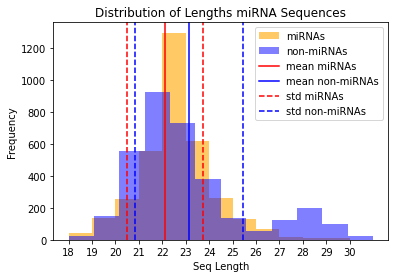

In [28]:
%matplotlib inline
plt.hist(lengths_p, color="orange", alpha=0.6,bins=12, label="miRNAs")
plt.hist(lengths_n, color="blue",alpha=0.5,bins=12, label="non-miRNAs")
plt.axvline(np.mean(lengths_p), color='red', label = "mean miRNAs")
plt.axvline(np.mean(lengths_n), color="blue", label="mean non-miRNAs")
plt.axvline(np.mean(lengths_p) - np.std(lengths_p), color="red", linestyle="dashed", label= "std miRNAs")
plt.axvline(np.mean(lengths_p) + np.std(lengths_p), color="red",linestyle="dashed")
plt.axvline(np.mean(lengths_n) - np.std(lengths_n), color="blue", linestyle="dashed", label= "std non-miRNAs")
plt.axvline(np.mean(lengths_n) + np.std(lengths_n), color="blue",linestyle="dashed")
plt.xticks(np.arange(min(lengths_p + lengths_n), max(lengths_p + lengths_n),1))
plt.title("Distribution of Lengths miRNA Sequences")
plt.xlabel("Seq Length")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("distribution_miRNAs_miRNAsNOT.png", transparent=True, format="png")
plt.show()


In [220]:
print(len(lengths_p)+ len(lengths_n))

6793


In [197]:
len(lengths_n)

3394

In [218]:
222/6800 * 100

3.264705882352941

In [198]:
print(np.min(lengths_n))
print(np.max(lengths_n))

18
31


In [29]:
y_negative = [0 for i in range(0, len(negative))]
y_positive = [1 for i in range(0, len(positive))]
Y = np.concatenate([y_negative,y_positive])
Xs = negative + positive

In [30]:
def padding(Xs):
    padded_seqs = []
    for seq in Xs:
        if len(seq) < 31:
            n = 31 - len(seq)
            K = "N"
            seq = seq.ljust(n + len(seq), K)
            padded_seqs.append(seq)
        else:
            padded_seqs.append(seq)
    return padded_seqs

In [31]:
X_padded_seqs = padding(Xs)

In [32]:
def one_hot_encoding(X_data):
    
    one_hot_encoded = []
    for seq in X_data:
        empty = np.zeros((len(seq),4))
        for i, n in enumerate(seq):
            if n == "A":
                empty[i,0] = 1
            elif n == "T":
                empty[i,1] = 1 
            elif n == "G":
                empty[i,2] = 1
            elif n == "C":
                empty[i,3] = 1
            else:
                pass
        one_hot_encoded.append(empty)
    return np.asarray(one_hot_encoded)   

In [33]:
X_one_hot = one_hot_encoding(X_padded_seqs)

In [34]:
for i, l in enumerate(X_one_hot):
    if l.shape != (31,4):
        print(l.shape)
        print("Check your data")
        print(i)

In [39]:
X_OH_train, X_OH_rem, y_train, y_rem = train_test_split(X_one_hot,Y, test_size=0.15, random_state=42)
X_OH_valid, X_OH_test, y_valid, y_test = train_test_split(X_OH_rem ,y_rem, test_size=0.5)

In [40]:
print("X_OH_train", X_OH_train.shape)
print("X_OH_valid",X_OH_valid.shape)
print("X_OH_test",X_OH_test.shape)
print("y_train",y_train.shape)
print("y_valid",y_valid.shape)
print("y_test",y_test.shape)

X_OH_train (5774, 31, 4)
X_OH_valid (509, 31, 4)
X_OH_test (510, 31, 4)
y_train (5774,)
y_valid (509,)
y_test (510,)


In [41]:
np.savez("hexapoda.npz", x_OH_train=X_OH_train,x_OH_valid= X_OH_valid, x_OH_test = X_OH_test, y_train=y_train, y_valid= y_valid, y_test=y_test)